### (一) 資料取得

In [17]:
import urllib.request as req
import json
import time as t
from datetime import *
import pandas as pd

In [12]:
# 台北
src1 = "https://tcgbusfs.blob.core.windows.net/blobyoubike/YouBikeTP.json"
with req.urlopen(src1) as response1:
    tp = json.load(response1)
    
# 新北
src2 = "https://data.ntpc.gov.tw/api/datasets/71CD1490-A2DF-4198-BEF1-318479775E8A/json?page=0&size=800"
with req.urlopen(src2) as response2:
    ntp = json.load(response2)
    
all_station =  [tp["retVal"][stats]["sna"] for stats in tp["retVal"]] + [stats["sna"] for stats in ntp] 
final_sbi = {"station":all_station}
final_bemp = {"station":all_station}


In [14]:
Count = 0
def getdata():
    global Count, final_sbi, final_bemp

    while True:
        try:
         # 台北          
            src1 = "https://tcgbusfs.blob.core.windows.net/blobyoubike/YouBikeTP.json"
            with req.urlopen(src1) as response1:
                tp = json.load(response1)
        # 新北
            src2 = "https://data.ntpc.gov.tw/api/datasets/71CD1490-A2DF-4198-BEF1-318479775E8A/json?page=0&size=800"
            with req.urlopen(src2) as response2:
                ntp = json.load(response2)
            break
        except:
            print(f"error{Count}")
            Count += 1
            t.sleep(3)
            continue
    
    sta_sbi, sta_bemp = [], []

    for stas in tp["retVal"]:
        sta_sbi.append(tp["retVal"][stas]["sbi"])
        sta_bemp.append(tp["retVal"][stas]["bemp"])
    
    sta_sbi2, sta_bemp2 = [], []
    for stas in ntp:
        sta_sbi2.append(stas["sbi"])
        sta_bemp2.append(stas["bemp"])
    
    final_sbi[str(datetime.now())] = sta_sbi+sta_sbi2
    final_bemp[str(datetime.now())] = sta_bemp+sta_bemp2
#   return final_sbi,final_bemp

In [18]:
# if datetime.now().hour >= 6:
#t.sleep(300)
for timess in range(2):
    getdata()
    print(final_sbi)
    print(final_bemp)
    print(timess)
    df_sbi = pd.DataFrame(final_sbi)
    df_bemp = pd.DataFrame(final_bemp)
    csvsbi = df_sbi.to_csv("sbi616.csv",encoding="utf-8-sig",index=False)
    csvbemp = df_bemp.to_csv("bemp616.csv",encoding="utf-8-sig",index=False)  
    t.sleep(2)

{'station': ['捷運市政府站(3號出口)', '捷運國父紀念館站(2號出口)', '台北市政府', '市民廣場', '興雅國中', '臺北南山廣場', '信義廣場(台北101)', '世貿三館', '松德站', '台北市災害應變中心', '三張犁', '臺北醫學大學', '福德公園', '榮星花園', '松山家商', '民生光復路口', '臺北市藝文推廣處', '象山公園', '民生敦化路口', '松山車站', '東新國小', '信義建國路口', '永吉松信路口', '捷運昆陽站(1號出口)', '捷運南港展覽館站(5號出口)', '五常公園', '金山愛國路口', '基隆長興路口', '辛亥新生路口', '捷運六張犁站', '中崙高中', '捷運行天宮站(1號出口)', '捷運行天宮站(3號出口)', '臺大資訊大樓', '捷運東門站(4號出口)', '臺灣師範大學(圖書館)', '南港世貿公園', '玉成公園', '中研公園', '捷運後山埤站(1號出口)', '凌雲市場', '捷運南港軟體園區站(2號出口)', '捷運公館站(2號出口)', '南港國小', '捷運忠孝新生站(4號出口)', '南港車站(忠孝東路)', '龍門廣場', '民權運動公園', '建國農安街口', '建國長春路口', '八德市場', '臺北市立圖書館(總館)', '臺北田徑場', '仁愛林森路口', '新生和平路口', '捷運善導寺站(1號出口)', '林森公園', '中山行政中心', '台灣科技大學', '南昌公園', '仁愛醫院', '國家圖書館', '青年公園3號出口', '師範大學公館校區', '捷運臺大醫院(4號出口)', '國興青年路口', '興豐公園', '捷運台北101/世貿站', '捷運信義安和站(4號出口)', '新生長安路口', '酒泉延平路口', '信義連雲街口', '基隆光復路口', '新生長春路口', '民生活動中心', '捷運圓山站(2號出口)', '捷運民權西路站(3號出口)', '華江高中', '捷運台電大樓站(2號出口)', '捷運西門站(3號出口)', '捷運大安森林公園站', '復華花園新城', '信義敦化路口', '民權復興路口', '捷運大安站', '捷運象山站', '和平重慶路口', '老松國小', '市立美術館', '開封西寧

### (二) 資料處理

In [9]:
import xlwings as xw
import pandas as pd

In [10]:
wb = xw.Book('bemp.xlsx')
sheet = wb.sheets['bemp']
last_column = sheet.range('A1').end('right').column
date_lst = []
for i in range(3, last_column+1):  # 區分日期
    figure = ''
    date = sheet.cells(1, i).value
    date = str(date)
    for j in range(len(date)-1):
        if date[j] == '.':
            break
        else:
            figure += date[j]
    date_lst.append(figure)

In [11]:
flow = 0
flow_dict = {}
last_row = sheet.range('A1').end('down').row

for stat in range(2, 10):  # 計算每日車流量
    flow_lst = []
    for i in range(3, last_column+1):
        # 如果在同一天，把一天的流量相加
        if date_lst[i-3] == date_lst[i-4] and 3 < i <= last_column:
            value = sheet.cells(stat, i).value - sheet.cells(stat, i-1).value
            flow += abs(value)
        else:  # 如果不同天，把這段時間流量加入list，flow歸零
            flow_lst.append(int(flow))
            flow = 0
        # 記得加入最後一天的流量
        if i == last_column:
            flow_lst.append(int(flow))
            
    flow_lst[0] = sheet.cells(stat, 2).value
    key = sheet.cells(stat, 1).value
    flow_dict[key] = flow_lst

flow_df = pd.DataFrame(flow_dict).T
flow_df.columns = ['sno', '6/12', '6/13', '6/14', '6/15', '6/16']
csvinf = flow_df.to_csv("Ubike_test.csv", encoding="utf-8-sig")

### (三) 資料分析和視覺化

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx # add basemap
import geopandas as gpd # plot shapefiles

In [20]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as R2

#### 3-1 匯入資料與資料格式調整

In [21]:
def get_districts():
    shapefile = gpd.read_file(fp + 'TWN_shp\TOWN_MOI_1100415.shp', encoding = 'utf8')
    # Taiwan districts shapefile import; combine the case numbers into dataframe
    covid_case = pd.read_csv(fp+'covid_case.csv', encoding = 'big5')
    Districts = shapefile.loc[shapefile.COUNTYNAME.isin(['臺北市', '新北市'])]
    Districts = Districts.merge(covid_case, how = 'left', on = ['COUNTYNAME', 'TOWNNAME'])
    
    for col in Districts.columns[8:]:
        Districts[col] = Districts[col].fillna(0)
        
    Districts = Districts.to_crs(epsg=3857)
    
    return Districts

In [22]:
def get_ubike():
    # ubikes coordinates data
    ubike = pd.read_csv(fp + 'ubikes_location.csv')
    # ubikes daily traffic volume
    ubike_traffic_volume = pd.read_csv(fp + 'ubikes_record.csv', encoding = 'big5')
    ubike = ubike.merge(ubike_traffic_volume, how = 'left', on = ['sno','sna']) # ubike stops' tickers and names
    
    return ubike

In [23]:
fp = r'C:\Users\hikim\OneDrive - g.ntu.edu.tw\School\ntupyxl\期末專案\\'
Districts = get_districts()
ubike = get_ubike()

C:\Users\hikim\anaconda3\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


### 3-2 資料分析 套入統計模型

In [24]:
def data_preparation(Districts, ubike):
    stat_summary = ubike.groupby('sarea').describe()
    
    # prepare Y array the covid case per region
    Districts = Districts.sort_values(by = 'TOWNNAME')
    valid_region = stat_summary.index.tolist()
    daily_cases_per_region = Districts.loc[Districts.TOWNNAME.isin(stat_summary.index), ['20210612', '20210613', '20210614', '20210615', '20210616']].values.T
    daily_cases_per_region = np.ravel(daily_cases_per_region)
    
    # prepare X array the features from ubike stops per region
    data_array = X_array_preparation(stat_summary)
    
    return daily_cases_per_region, data_array

In [33]:
def X_array_preparation(stat_summary):
    data_array = np.full((5,1), np.nan)
    features = ['25%', '50%', '75%', 'std']
    
    day = 1
    tot_mean = stat_summary.loc[:, ('tot', 'mean')].values
    for date in ['20210612', '20210613', '20210614', '20210615', '20210616']:
        # collect daily ubikes stop info into data array
        date_vars = stat_summary.loc[:, (date, features)].values.T
        date_vars_rate = date_vars/tot_mean
        day_af = np.full((1, date_vars.shape[1]), day)
        day += 1
        date_vars = np.concatenate((date_vars, day_af), axis = 0)
        #date_vars = np.concatenate((date_vars_rate, day_af), axis = 0)
        #date_vars = np.concatenate((date_vars, date_vars_rate, day_af), axis = 0)
        data_array = np.concatenate((data_array, date_vars), axis = 1)

    data_array = data_array[:, 1:]
    data_array = np.nan_to_num(data_array, nan = 0)
    
    return data_array

In [34]:
def layout_coef(model, X_train, Y_train):
    features = ['25%', '50%', '75%', 'std', '25%_rate', '50%_rate', '75%_rate', 'std_rate', 'day_af']
    for i in range(len(model.coef_)):
        f = features[i+0]
        f_coef = model.coef_[i]
        print('{:8} : {:.2f}'.format(f, f_coef))
    print('intercept {:.2f}\nR_square {:.2%}'.format(model.intercept_, R2(Y_train, model.predict(X_train))))

In [30]:
def fit_models(X_array, Y_array):
    # train test split
    X_train, X_test, Y_train, Y_test = train_test_split(X_array.T, Y_array, test_size = 0.25, random_state = 1)
    # two models setup
    simple_reg = linear_model.LinearRegression()
    ridgecv = linear_model.RidgeCV(alphas = np.logspace(0,10,5), cv = 10)
    
    # training sets 
    simple_reg.fit(X_train, Y_train)
    ridgecv.fit(X_train, Y_train)
    
    print('Linear Regression\nTraining')
    layout_coef(simple_reg, X_train, Y_train)
    simple_r2 = R2(Y_test,simple_reg.predict(X_test))
    print('Testing\nR_square {:.2%}'.format(simple_r2))
    print()
    
    ridgecv_r2 = R2(Y_test, ridgecv.predict(X_test))
    print('RidgeCV 10-fold\nTraining')
    layout_coef(ridgecv, X_train, Y_train)
    print('Testing\nR_square {:.2%}'.format(ridgecv_r2))

In [36]:
print('第一組資料')
daily_cases_per_region, data_array = data_preparation(Districts, ubike) # Y and X array
fit_models(data_array, daily_cases_per_region)

第一組資料
Linear Regression
Training
25%      : 0.03
50%      : -0.01
75%      : 0.02
std      : 0.04
25%_rate : -1.09
intercept 2.92
R_square 23.39%
Testing
R_square -14.18%

RidgeCV 10-fold
Training
25%      : 0.01
50%      : 0.01
75%      : 0.02
std      : 0.02
25%_rate : -0.00
intercept 1.42
R_square 12.97%
Testing
R_square -3.75%


In [32]:
print('第二組資料')
daily_cases_per_region, data_array = data_preparation(Districts, ubike)
fit_models(data_array, daily_cases_per_region)

第二組資料
Linear Regression
Training
25%_rate : 0.85
50%_rate : -0.19
75%_rate : -0.19
std_rate : 2.64
day_af   : -1.07
intercept 2.91
R_square 21.79%
Testing
R_square -14.17%

RidgeCV 10-fold
Training
25%_rate : 0.94
50%_rate : -0.11
75%_rate : 0.32
std_rate : 2.14
day_af   : -1.06
intercept 2.94
R_square 21.77%
Testing
R_square -14.23%


In [173]:
print('第一組合併第二組資料')
daily_cases_per_region, data_array = data_preparation(Districts, ubike)
fit_models(data_array, daily_cases_per_region)

第一組合併第二組資料
Linear Regression
Training
25%      : 0.64
50%      : -1.38
75%      : 1.95
std      : -0.80
25%_rate : -25.06
50%_rate : 56.29
75%_rate : -78.81
std_rate : 34.12
day_af   : -1.08
intercept 3.87
R_square 26.69%
Testing
R_square -12.84%

RidgeCV 10-fold
Training
25%      : 0.01
50%      : 0.01
75%      : 0.02
std      : 0.02
25%_rate : 0.00
50%_rate : 0.00
75%_rate : 0.00
std_rate : 0.00
day_af   : -0.00
intercept 1.42
R_square 12.97%
Testing
R_square -3.75%


#### 3-3 視覺化

In [37]:
def visualization(Districts, ubike):
    # show northern taiwan districts and ubikes stops location
    for date in ['20210612', '20210613', '20210614', '20210615', '20210616']: # date sample ex: 20210612
        plot_basemap(Districts, date)
        scatter_ubikes(ubike, date)
    

In [38]:
def plot_basemap(Districts, date):
    global fp
    
    fig, ax = plt.subplots(figsize = (10,10))
    # customization on map could be adjusted here
    fig = Districts.plot(ax = ax, alpha = 0.8, edgecolor = 'black', column = date, scheme = 'quantiles', k = 5, cmap = 'OrRd')
    ax.set_axis_off()
    
    plt.savefig('{}_districts.png'.format(date), bbox_inches = 'tight', dpi = 200)
    print('{}_fig saved'.format(date))
    

In [39]:
# transmitting ubikes traffic volume to help visulization
def transmit_scale(series):
    mean, std = series.mean(), series.std()
    scale = (series - mean)/ std
    scale = (scale - scale.min())
    scale = scale/ scale.max()
    
    fix_scale = []
    for point in scale:
        if point <= scale.quantile(0.95):
            fix_scale.append(0)
        else:
            fix_scale.append(point**3)
    fix_scale = [200*x/max(fix_scale) for x in fix_scale]
    
    return fix_scale


In [40]:
def scatter_ubikes(ubike, date):
    backgroundmap = plt.imread(fp + '{}_districts.png'.format(date))
    # Boundry_Box = (x_min, x_max, y_min, y_max)
    BBox = (121.247,122.0400,24.6400,25.3350)
    fig, ax = plt.subplots(figsize = (10,10))
    
    scale = transmit_scale(ubike[date])
    ax.scatter(ubike.lng, ubike.lat, zorder = 1, marker = 'o', alpha = 0.5, color = 'blue', s = scale)

    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.set_axis_off()
    plt.title(f'{date} ubike hot spots', fontdict={'fontsize': 20})
    
    # plot the scatter plots on the basemap of taipei's districts
    ax.imshow(backgroundmap, zorder=0, extent = BBox, aspect= 'auto')
    plt.savefig(fp + 'output\\' + '{}_districts.png'.format(date), bbox_inches = 'tight', dpi = 200)
    

In [9]:
def ubikes_on_map(Districts, ubike_gdf):
    fig, ax = plt.subplots(figsize = (10,10))
    fig = Districts.plot(ax = ax, edgecolor = 'black', color = 'gray', alpha = 0.3)
    ctx.add_basemap(ax)
    ax.set_axis_off()
    plt.savefig('Ubike.png', bbox_inches='tight', dpi = 200)
    
    background = plt.imread(fp + 'Ubike.png')
    BBox = (121.247,122.0400,24.6400,25.3350)
    fig, ax = plt.subplots(figsize = (10,10))
    ax.scatter(ubike_gdf.lng, ubike_gdf.lat, zorder = 1, marker = 'o', alpha = 0.5, color = 'b', s = 1)
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.set_axis_off()
    ax.imshow(background, zorder=0, extent = BBox, aspect= 'auto')
    plt.savefig(fp + 'output\\' + 'Ubike.png', bbox_inches = 'tight', dpi = 200)
    

20210612_fig saved
20210613_fig saved


C:\Users\hikim\anaconda3\lib\site-packages\mapclassify\classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\hikim\anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


20210614_fig saved


C:\Users\hikim\anaconda3\lib\site-packages\mapclassify\classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\hikim\anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


20210615_fig saved
20210616_fig saved


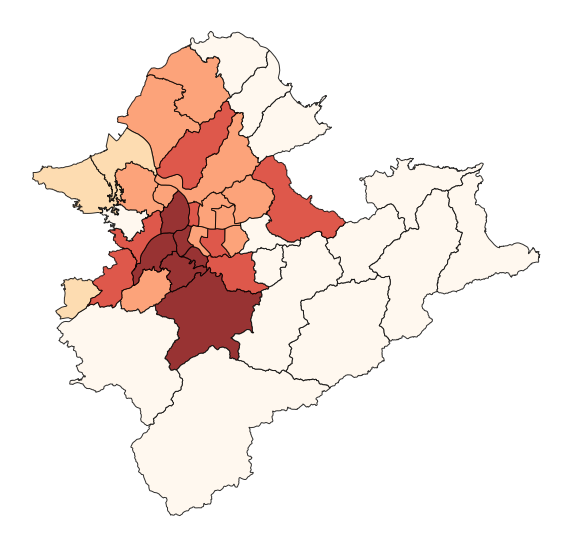

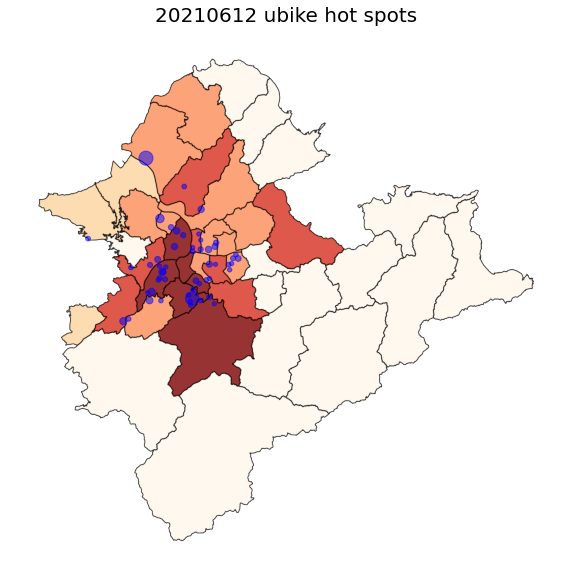

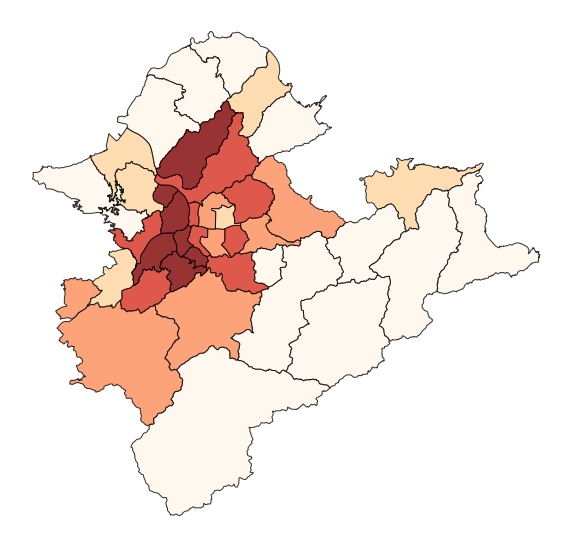

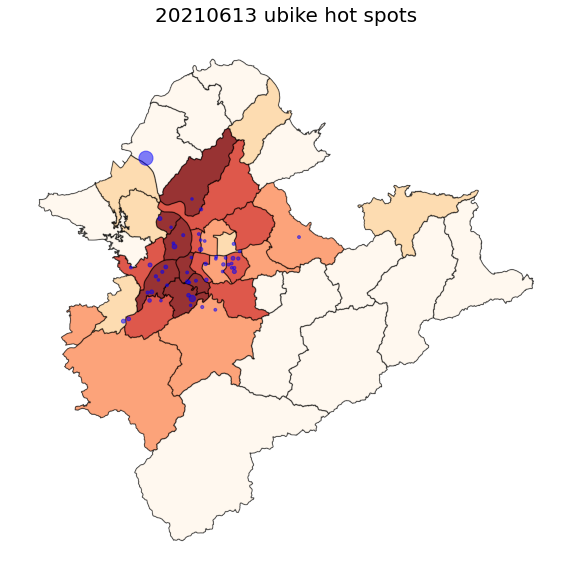

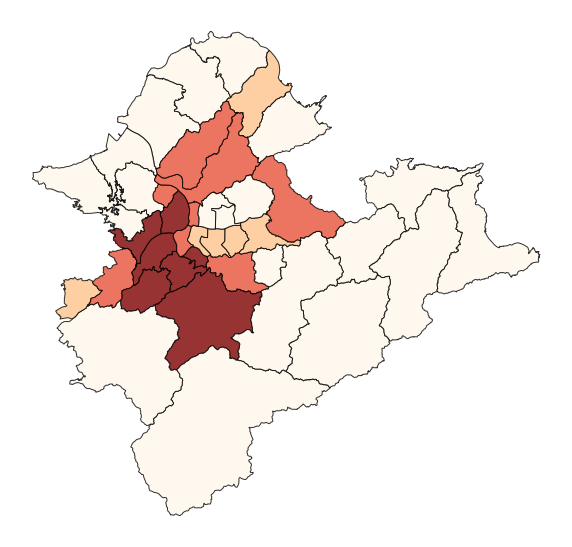

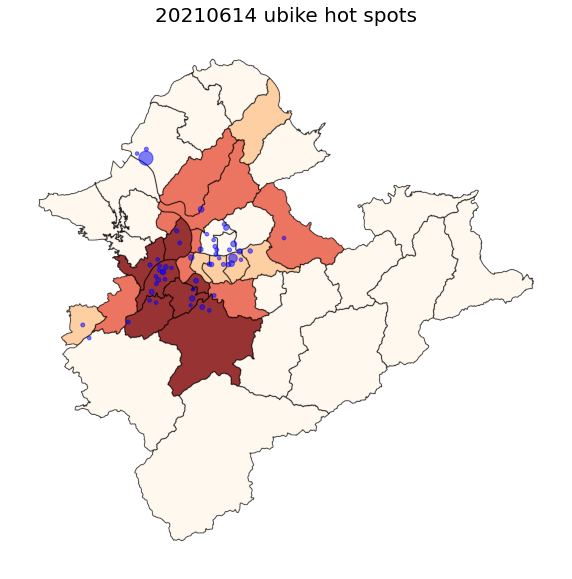

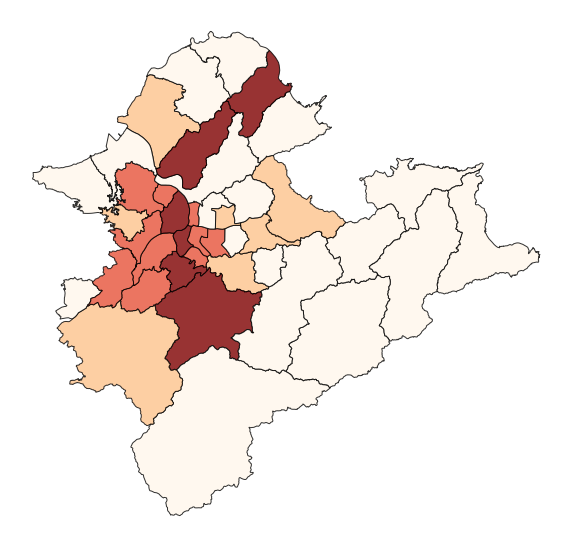

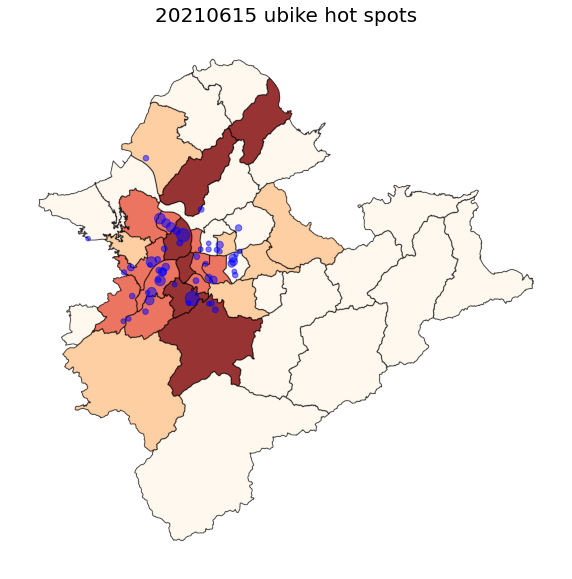

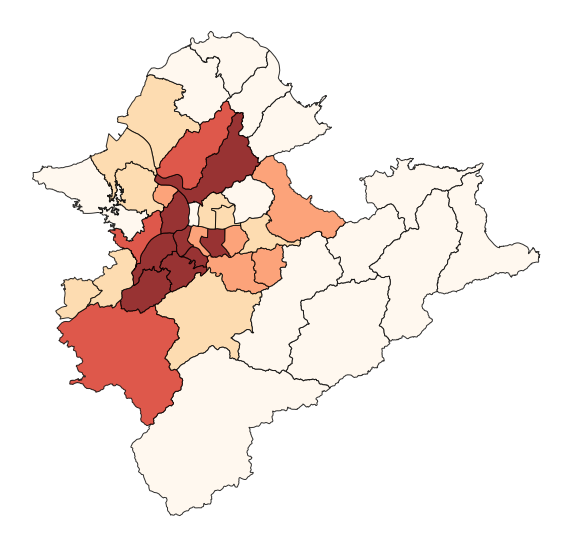

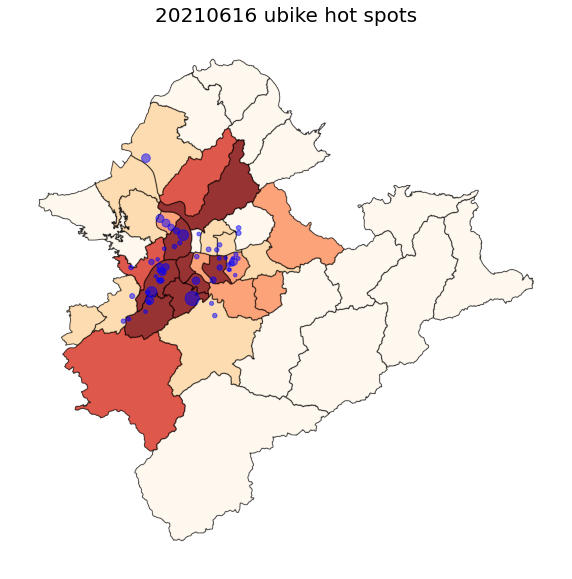

In [41]:
visualization(Districts, ubike)